In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

#df = pd.read_csv('alinitydata.csv')
#df['datetimestamplocal'] = pd.to_datetime(df['datetimestamplocal'], format="%m/%d/%Y %H:%M")

# Extract only the time (HH:MM in 24-hour format) for the x-axis
#df['time_of_day'] = df['datetimestamplocal'].dt.strftime('%H:%M')

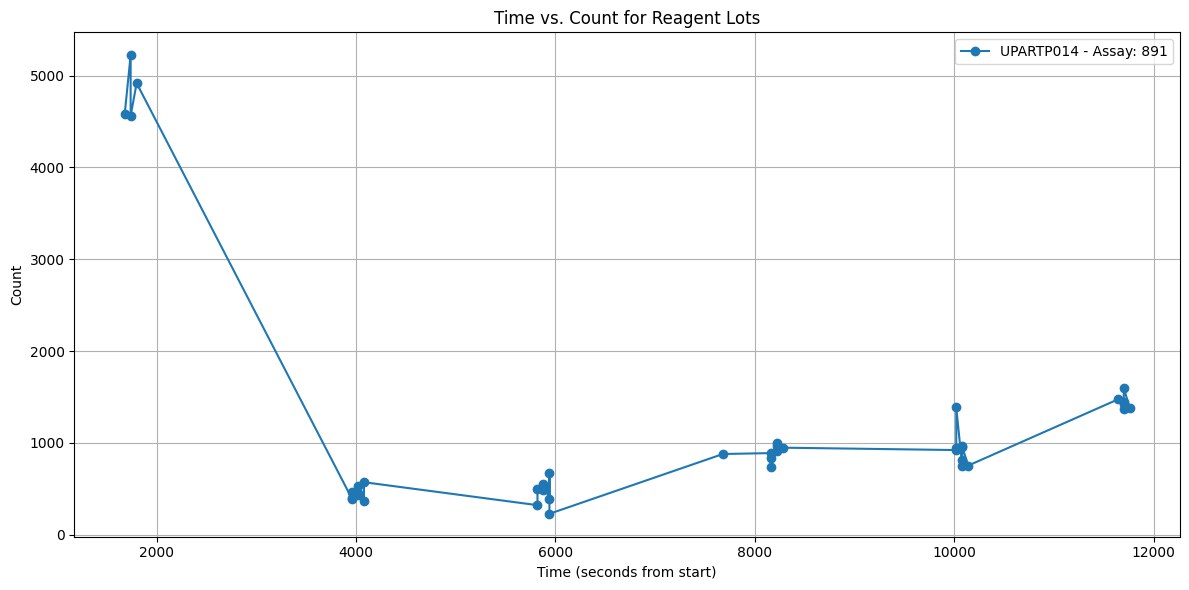

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('alinitydata.csv')
df['datetimestamplocal'] = pd.to_datetime(df['datetimestamplocal'], format="%m/%d/%Y %H:%M")

# Extract only the time (HH:MM in 24-hour format) for the x-axis
df['time_of_day'] = df['datetimestamplocal'].dt.strftime('%H:%M')

# Define the reagent lots to plot
reagent_lots = ['UPARTP014',]

# Filter for the reagent lots you want
df_filtered = df[df['reagentmasterlotnumber'].isin(reagent_lots)]

# Sort the data
df_filtered = df_filtered.sort_values(by='datetimestamplocal')

# Create a new figure for plotting all reagent lots on the same graph
plt.figure(figsize=(12, 6))

# Get all unique times for the x-axis and ensure they are sorted
time_of_day_values = sorted(df_filtered['time_of_day'].unique())

# Loop through reagent lots and plot the data
for reagent_lot in reagent_lots:
    # Filter data for the current reagent lot
    lot_data = df_filtered[df_filtered['reagentmasterlotnumber'] == reagent_lot]
    
    # Sort by time
    lot_data = lot_data.sort_values('datetimestamplocal')
    
    # Normalize the time to start from 0 for each reagent lot
    lot_data['time_normalized'] = (lot_data['datetimestamplocal'] - lot_data['datetimestamplocal'].min()).dt.total_seconds()
    
    # Loop through assays and plot each one for the current reagent lot
    for assaynumber, group in lot_data.groupby('assaynumber'):
        # Plot data for this assay (for the current reagent lot)
        plt.plot(group['time_normalized'], group['correctedcount'], marker='o', linestyle='-', label=f"{reagent_lot} - Assay: {assaynumber}")

# Labels and title
plt.xlabel("Time (seconds from start)")
plt.ylabel("Count")
plt.title("Time vs. Count for Reagent Lots")

# Show the grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()





In [12]:
#plt.figure(figsize=(12, 6))
#plt.plot(first_reagent['time_of_day'], first_reagent['correctedcount'], marker='o', linestyle='-')
#plt.xticks(rotation=45, ha='right')

# Labels and title
#plt.xlabel("Time of Day")
#plt.ylabel("Count")
#plt.title("Time of Day vs. Count")

# Show the plot
#plt.grid(True)
#plt.show()

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('alinitydata.csv')

# Get unique values from the 'reagentmasterlotnumber' column
unique_lots = df['reagentmasterlotnumber'].unique()

# Convert the unique values to a list of strings with single quotes
formatted_lots = ", ".join(f"'{lot}'" for lot in unique_lots)

# Print the formatted list with commas and single quotes
print(formatted_lots)





'63055F900', '00BLANK00', 'UPARTP014', 'WWILBLANK', '65078F900', 'FT4FS7PK1', '61459UD00', '63043F900', 'UPARTP011', '082324I01', '100224IL1', 'UPARTP005', '12152UP00', '12080UP00', '0030D600T', '01808L824', 'UPARTP001', '2456R45A1', '63051F900', '24405CS00', 'AC8640010', 'UPARTP013', 'AMHWASC01', 'BE6962455', 'JB312139B', 'JB312140A', 'JB312140B', 'JB312140C', 'JB312139G', '24441CS00', '65695UD00', 'JB312139K', 'JB312139C', 'JB312139A', '68330FP00', 'JB103124B', 'JB312140D', 'SB887ASDA', '60008F900', 'JB312139H', '12345F300', '59039F900', 'JB312139F', 'JB312139L', 'JB103124D', '66071UD00', '111224L01', '63148FP00', 'SB820062B', 'AMH68055C', 'AMHBC005C', '60001F900', '64278UD0G', '62018UD0G', 'ONESTEPBR', 'AMH68015C', 'AMHA50N5C', 'AMH68255C', '060624B01', '67266FP00', '999999D01', 'AMHBS055C', 'JB312139M', '68016F900', '63161UD00', '2456R45B1', 'AMHBCPRSN', 'UPARTP017', 'UPARTP008', 'UPARTP015', '24RU01700', '66001F900', 'JB312139I', 'SB864141B', 'TOX110924', 'BUFFER832', 'CMV110924',

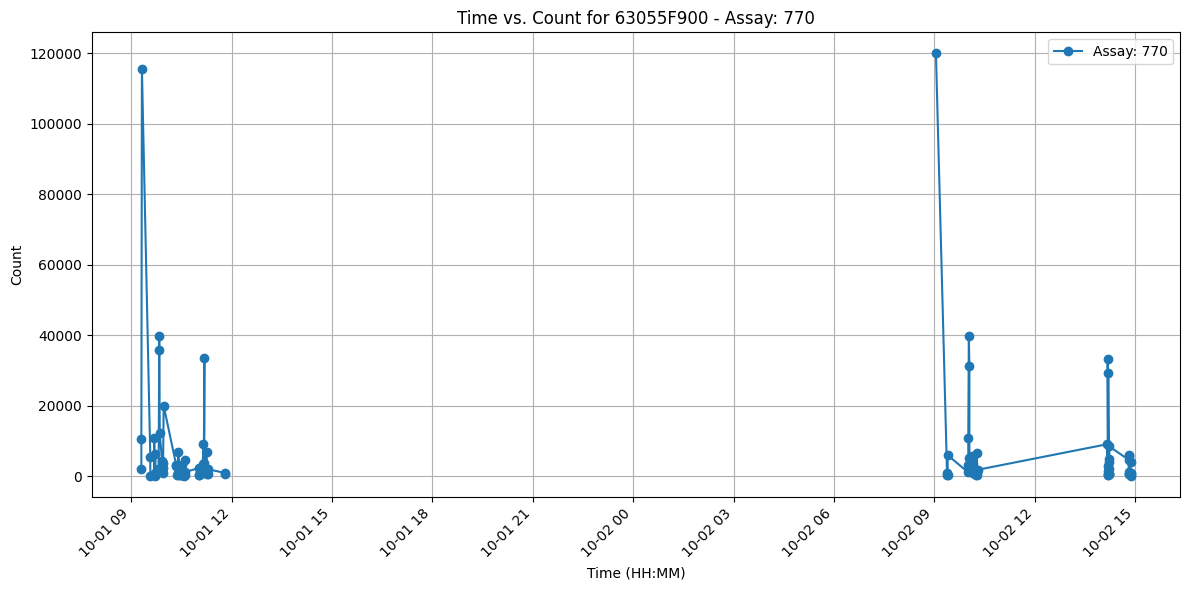

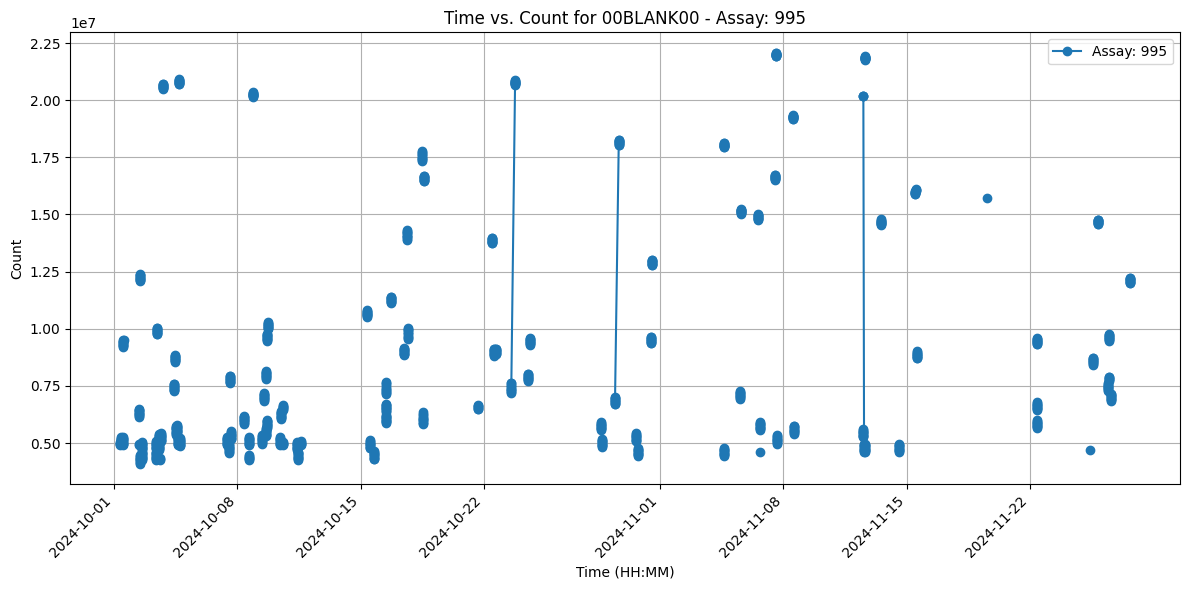

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('alinitydata.csv')
df['datetimestamplocal'] = pd.to_datetime(df['datetimestamplocal'], format="%m/%d/%Y %H:%M")

# Extract only the time (HH:MM in 24-hour format) for the x-axis
df['time_of_day'] = df['datetimestamplocal'].dt.strftime('%H:%M')

# Define the reagent lots to plot
reagent_lots = ['63055F900', '00BLANK00']
# Filter for the reagent lots you want
df_filtered = df[df['reagentmasterlotnumber'].isin(reagent_lots)]

# Sort the data
df_filtered = df_filtered.sort_values(by='datetimestamplocal')

# Loop through each reagent lot and create a separate plot
for reagent_lot in reagent_lots:
    # Filter data for the current reagent lot
    lot_data = df_filtered[df_filtered['reagentmasterlotnumber'] == reagent_lot]
    
    # Sort by time
    lot_data = lot_data.sort_values('datetimestamplocal')
    
    # Check how many assays are there for the current reagent lot
    unique_assays = lot_data['assaynumber'].unique()

    # If more than two assays exist, plot them separately
    for assaynumber in unique_assays:
        assay_data = lot_data[lot_data['assaynumber'] == assaynumber]
        
        # Create a new figure for this assay
        plt.figure(figsize=(12, 6))
        
        # Plot the data for this assay with the regular time
        plt.plot(assay_data['datetimestamplocal'], assay_data['correctedcount'], marker='o', linestyle='-', label=f"Assay: {assaynumber}")
        
        # Labels and title
        plt.xlabel("Time (HH:MM)")
        plt.ylabel("Count")
        plt.title(f"Time vs. Count for {reagent_lot} - Assay: {assaynumber}")
        
        # Improve x-axis formatting for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Show the grid and legend
        plt.grid(True)
        plt.legend(loc='best')
        
        # Show the plot
        plt.tight_layout()
        plt.show()

